# Classification

In this example we'll use the [**Iris dataset**](https://en.wikipedia.org/wiki/Iris_flower_data_set), a really common and publicly available dataset for classification.

![Iris](http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png)

It's already built into the scikit learn package, we can just do `load_iris()`. (Read more [in scikit-learn docs](http://scikit-learn.org/stable/modules/neighbors.html#classification)).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [6]:
df = pd.DataFrame(
    data=np.c_[iris.data, iris.target],
    columns=iris.feature_names + ['target'])

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df['Species'] = pd.Series(iris.target_names).take(iris.target).values

In [21]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


## Splitting the Data

We can't test or validate our model with the same data we're using to train it. But these 150 observations are the only ones we have, so we'll need to split them into "training" and "testing" sets.

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.4, random_state=10)

Now that we've split the data, we can start "classifying" it.

# Classification Algorithms

## K Nearest Neighbors

The [K Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is probably the simplest classification algorithm. It's highly intuitive.

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Using only two variables ("Sepal length" and "Sepal width"), we can now visualize a little bit how the species are distributed:

**Sepal length vs Sepal Width:**

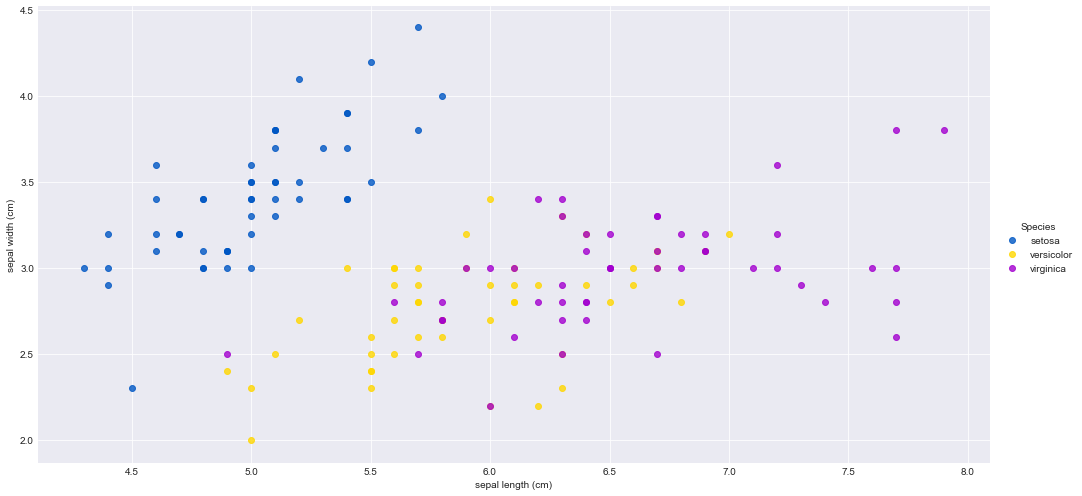

In [26]:
sns.lmplot(
    x="sepal length (cm)", y="sepal width (cm)", data=df,
    size=7, aspect=2,
    fit_reg=False, hue='Species', legend=True, palette='prism')

**Petal length vs Petal Width:**

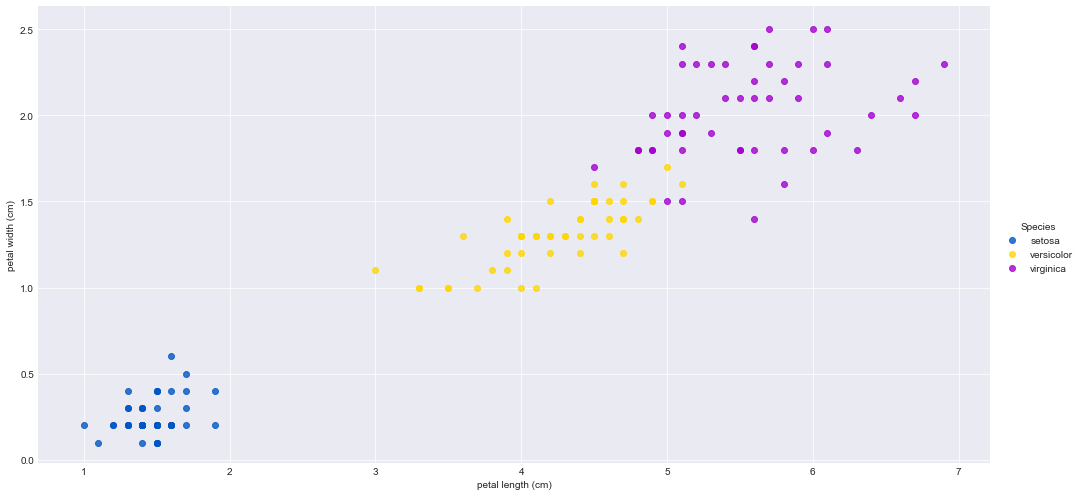

In [9]:
sns.lmplot(
    x="petal length (cm)", y="petal width (cm)", data=df,
    size=7, aspect=2,
    fit_reg=False, hue='Species', legend=True, palette='prism')

Using only the sepal, we can see that there's a clear boundary between "Setosas" and the rest ("Versicolor" and "Virginica").

How would we respond to new, unknown observations? Let's visualize it first:

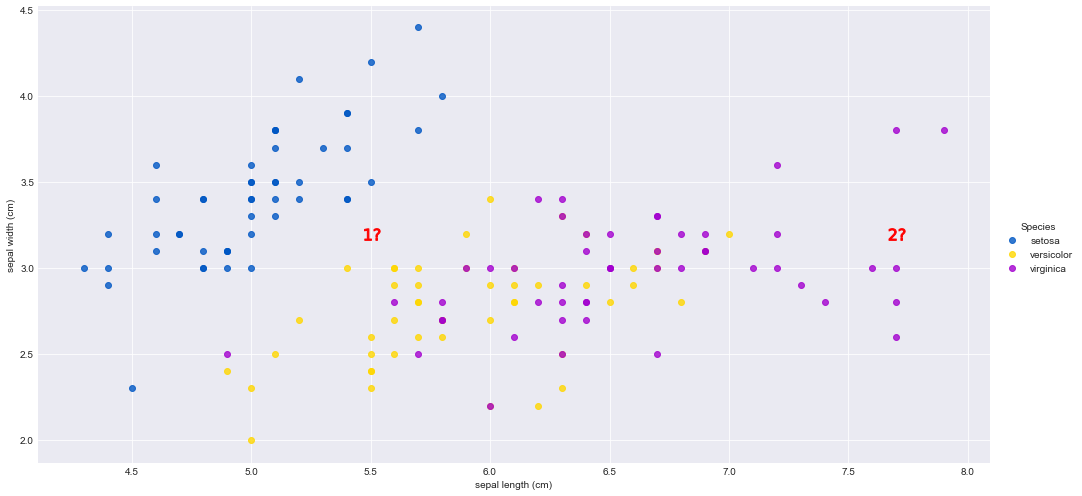

In [14]:
grid = sns.lmplot(
    x="sepal length (cm)", y="sepal width (cm)", data=df,
    size=7, aspect=2,
    fit_reg=False, hue='Species', legend=True, palette='prism')
plt.scatter([5.5], [3.2], marker='$1?$', color='red', s=[300])
plt.scatter([7.7], [3.2], marker='$2?$', color='red', s=[300])

We'd probably classify `2?` as Virginica, as it's closer to other virginicas. But what about a `1`? 

The K-nearest neighbors will try to decide the "species" of the new observation based on the, wait for it, K nearest neighbors!

In [28]:
from matplotlib.patches import Ellipse

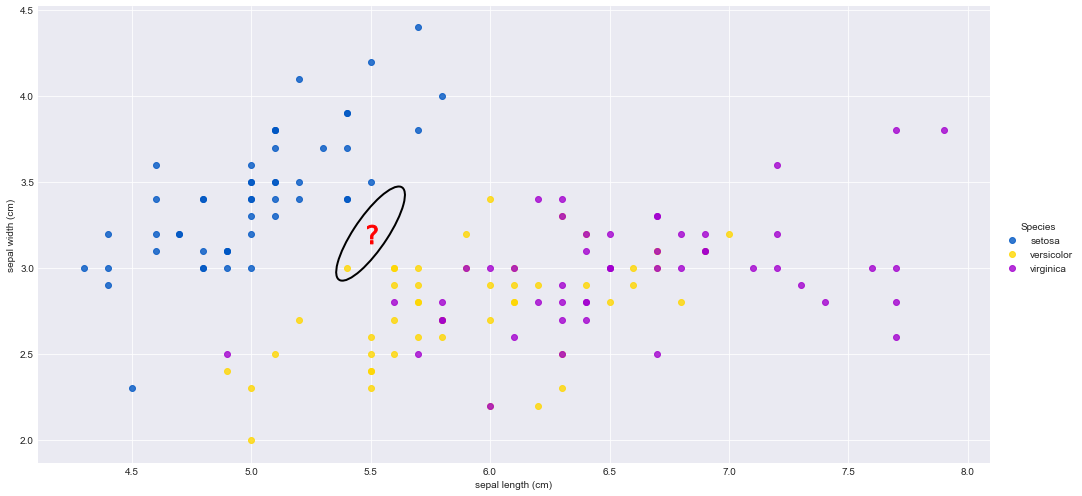

In [29]:
region = Ellipse(xy=(5.5, 3.2), width=.6, height=.15, angle=245, fill=False, lw=2)

grid = sns.lmplot(
    x="sepal length (cm)", y="sepal width (cm)", data=df,
    size=7, aspect=2,
    fit_reg=False, hue='Species', legend=True, palette='prism')
plt.scatter([5.5], [3.2], marker='$?$', color='red', s=[350])

grid.ax.add_artist(region)

The "Hyperparam" passed to the algorithm is used to decide "how many" **K** neighbors to use to classify the new observation.

![](https://docs.google.com/drawings/d/e/2PACX-1vQKmHrenJp508HB-6d0oN0V3RMDqpVCHt2V3E1T8RCRnYdyv50sSIQNli2leRUP7LpT6lmbEViUNRqY/pub?w=1202&h=810)

The scikit learn code is simple, as usual:

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
knn.score(X_test, y_test)

0.95

For classification models (such as K-nearest neighbors or Decision Trees), the score method returns the accuracy, that is, the fraction of the test data the classifier can label correctly. A `95%` score means that the model was able to predict the right "type" (label, category) of 95% of the samples. Pretty good right?

In [37]:
knn.predict(X_test[:2])

array([1, 2])

In [39]:
results = pd.DataFrame({
    'Sepal Length': X_test[:,0],
    'Sepal Width': X_test[:,1],
    'Petal Length': X_test[:,2],
    'Petal Width': X_test[:,3],
    'True Values': y_test,
    'Predicted': knn.predict(X_test)
}, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width','True Values', 'Predicted'])
results.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,True Values,Predicted
0,6.3,2.3,4.4,1.3,1,1
1,6.4,2.7,5.3,1.9,2,2
2,5.4,3.7,1.5,0.2,0,0
3,6.1,3.0,4.6,1.4,1,1
4,5.0,3.3,1.4,0.2,0,0


In [40]:
misses = results[results['True Values'] != results['Predicted']]
misses

,Sepal Length,Sepal Width,Petal Length,Petal Width,True Values,Predicted
6,6.3,2.5,4.9,1.5,1,2
47,5.9,3.2,4.8,1.8,1,2
57,6.1,2.9,4.7,1.4,1,2


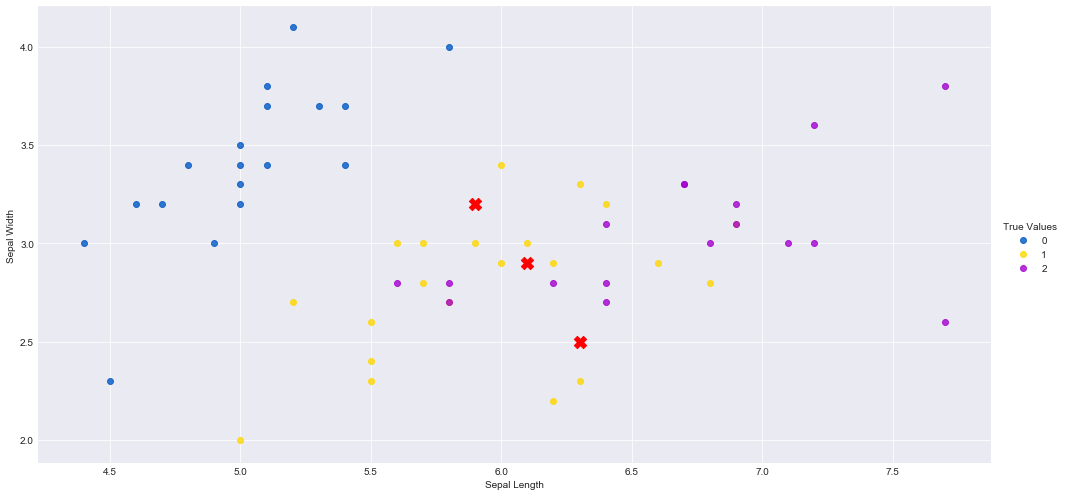

In [41]:
grid = sns.lmplot(
    x="Sepal Length", y="Sepal Width", data=results,
    size=7, aspect=2,
    fit_reg=False, hue='True Values', legend=True, palette='prism')
plt.scatter(misses['Sepal Length'].values, misses['Sepal Width'].values, marker='X', color='red', s=[150])

### Testing Different Parameters

We can then test different `K` parameters and see which one performs best:

In [42]:
k_values = np.arange(1, 51)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

In [45]:
results = pd.DataFrame({
    'K': k_values,
    'Scores': scores
})
results.head()

,K,Scores
0,1,0.916667
1,2,0.933333
2,3,0.933333
3,4,0.966667
4,5,0.950000


In [46]:
import matplotlib.ticker as plticker

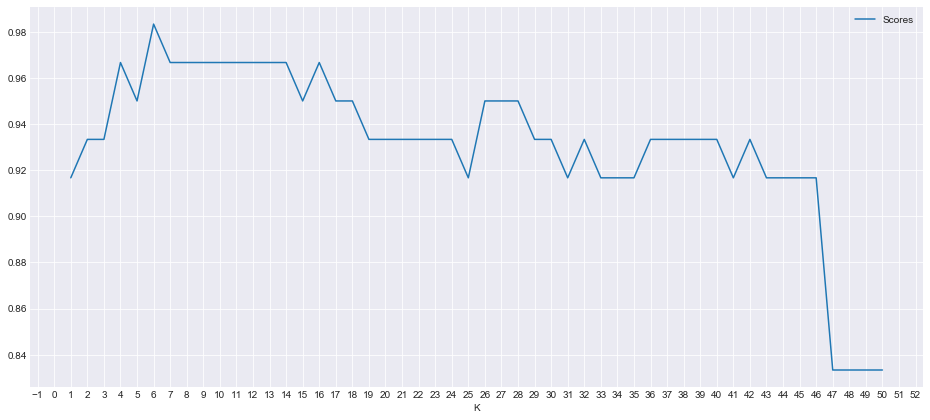

In [47]:
ax = results.plot(x='K', y='Scores', figsize=(16, 7), x_compat=True)
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))

In this example, 6 seems to be our best param, with an accuracy of:

In [48]:
scores[5]

0.9833333333333333

### Problems

But there's a major problem we haven't considered. What data did we use to train this model? We used the `train_test_split` function to split our dataset into training and testing sets, on a "semi-random" basis (using `random_state=10`). What if the data would have been split differently? Would 6 be still the best parameter? Let's see it!

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.4, random_state=5)

In [50]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

As you can see, the performance of `K=6` is now `0.96`, lower than the highest point that we found before. Let's repeat the process and analyze again different values for `K`:

In [51]:
k_values = np.arange(1, 51)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

In [52]:
results = pd.DataFrame({
    'K': k_values,
    'Scores': scores
})
results.head()

,K,Scores
0,1,0.966667
1,2,0.916667
2,3,0.983333
3,4,0.966667
4,5,0.966667


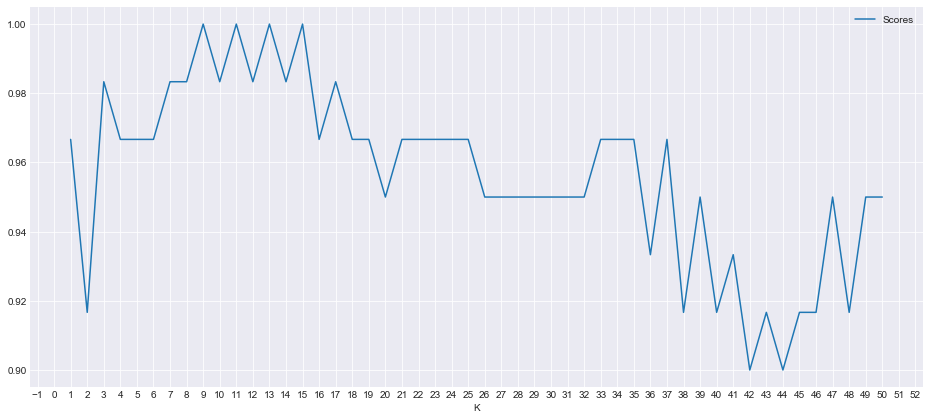

In [53]:
ax = results.plot(x='K', y='Scores', figsize=(16, 7), x_compat=True)
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))

Now we have multiple "100%" options in `9`, `11`, `13` and `15`. The actual number is not important. What's most important is realizing that, by splitting the data differently, we're arriving to different parameters.

### Cross Validation

Cross validation works by defining multiple experiments to run in our sample data. It's a little bit more resource intensive, but it'll let us have a better evaluation of our parameters and model.

![Cross Validation](https://i.stack.imgur.com/1fXzJ.png)

Let's start with an example. Was it possible `6` better than the other `k` parameters?

First, we import the `cross_val_score`, that will compute the score for our estimator.

In [54]:
from sklearn.model_selection import cross_val_score

We now need to build the estimator with those parameters that we want to evaluate:

In [55]:
knn = KNeighborsClassifier(n_neighbors=6)

We now use **the entire dataset**, as it'll be split internally by the cross validator. `cv=5` indicates to split the dataset into `5` "folds" (as seen in the picture).

In [56]:
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

Now we could get the average and deviation of our scores:

In [57]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


We can now test other `k` parameters and see how they compare to 6.

**k = 10**

In [58]:
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.05)


**k = 11**

In [59]:
knn = KNeighborsClassifier(n_neighbors=11)
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.05)


**k = 12**

In [60]:
knn = KNeighborsClassifier(n_neighbors=12)
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.05)


**k = 13**

In [61]:
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.05)


**k = 14**

In [62]:
knn = KNeighborsClassifier(n_neighbors=14)
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.06)


As you can see, `k=6` is still pretty good (arguably the best one).

### Split Strategy

You can also define the strategy to split the dataset, selecting one of the [many](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) built-in. Let's see an example:

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

In [64]:
knn = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(knn, iris.data, iris.target, cv=StratifiedShuffleSplit(
    n_splits=5, test_size=0.4, random_state=10))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)
